# KNN Classification on Iris Dataset

What is KNN?
- KNN stands for “K-Nearest Neighbors”
- It’s a smart way for computers to guess or predict something by looking at the nearest examples.


🍕 1. Recommending Food You Might Like
If you say you love spicy noodles and bubble tea, KNN can find other people with similar taste and suggest foods they like too—like kimchi fries or mango lassi!
💡 How it works: "You're like these 3 friends, and they liked X—so you probably will too."


🛍️ 2. Online Shopping Suggestions
Ever notice how Amazon shows “customers who bought this also bought…”? That’s kind of like KNN saying:
“Other people who bought sneakers also bought sports socks and protein bars.”


📷 3. Image Recognition (like Face Unlock on Your Phone)
Your phone learns your face by comparing it to pictures it already knows. If it sees enough nearby examples that match, it says "Yep, that’s you."
🧠 Like saying: "This new face is really similar to these 5 faces I already know."


✉️ 4. Sorting Emails (Spam or Not Spam)
KNN helps email services tell if a message is junk by looking at how similar it is to known spam emails.
📪 “This message looks like 4 others that were spam… probably spam!”


🧑‍⚕️ 5. Medical Diagnosis Help
Doctors can use KNN to compare a patient’s symptoms to others and figure out what illness they might have.
🏥 “These symptoms look like 3 other cases—so it might be the same issue.”



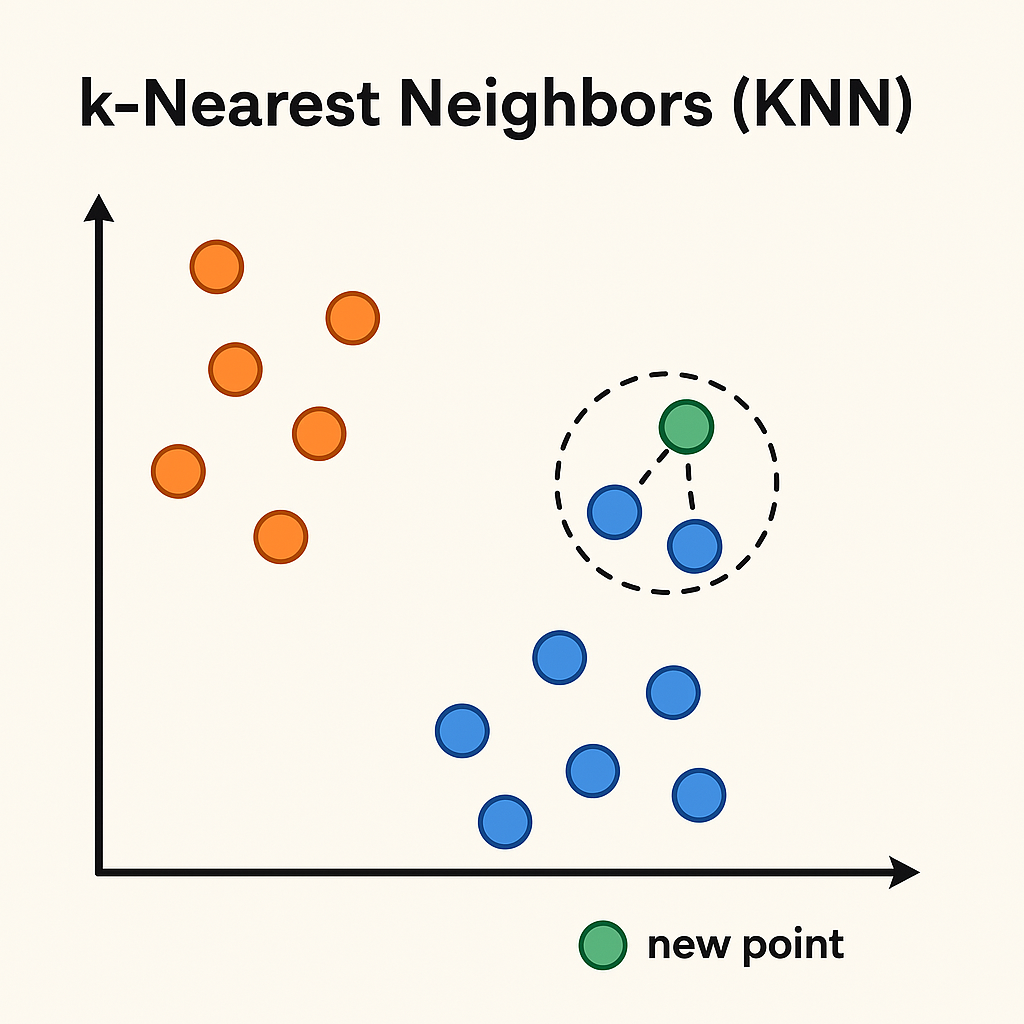

In [ ]:
pip install scikit-learn pandas numpy matplotlib seaborn scipy

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# It contains 150 samples from three species of the Iris flower: 1. Iris setosa 2. Iris versicolor 3. Iris virginica
dataset = load_iris()

In [8]:
# Explore the dataset structure
print("Dataset keys:", dataset.keys())

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
# Convert to pandas DataFrame for easier manipulation
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target, name='species')

In [10]:
# Add target names for better readability
y_names = pd.Series([dataset.target_names[i] for i in y], name='species_name')

# Create a complete DataFrame
iris_df = pd.concat([X, y, y_names], axis=1)

# Basic information about the dataset
print("\nDataset shape:", iris_df.shape)
print("\nFirst 5 rows:")
print(iris_df.head())


Dataset shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [11]:
# Summary statistics
print("\nSummary statistics:")
print(iris_df.describe())


Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [12]:
# Check for missing values
print("\nMissing values:", iris_df.isnull().sum().sum())


Missing values: 0


In [13]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_name'],
      dtype='object')

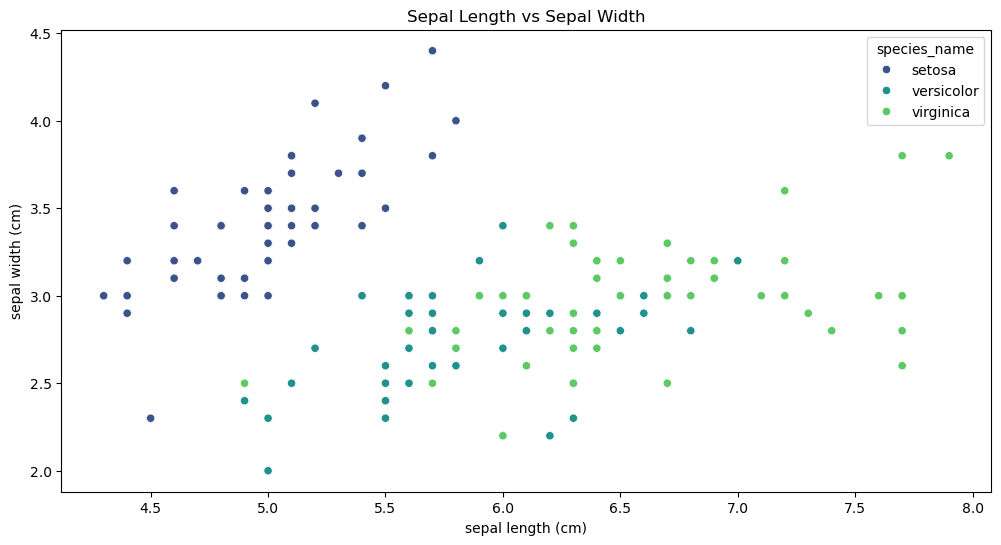

In [14]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species_name', data=iris_df, palette='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [15]:
iris_df.groupby("species_name").count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
species_name                                                           
setosa                       50                50                 50   
versicolor                   50                50                 50   
virginica                    50                50                 50   

              petal width (cm)  species  
species_name                             
setosa                      50       50  
versicolor                  50       50  
virginica                   50       50

In [16]:
# Split the dataset into independent and dependent variables
feature_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
x = iris_df[feature_columns].values
y = iris_df['species_name'].values

In [17]:
# use label encoder to convert categorical values into int; since this dataset already has encoded values we don't need this step but keeping code for future use
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['species_code'] = le.fit_transform(iris_df['species_name'])

In [18]:
# model validation to see how the model performs on new or test data
from sklearn.model_selection import train_test_split

In [19]:
# split the dataset into train and test, 80% data is used for training and 20% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Import library to plot graph
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

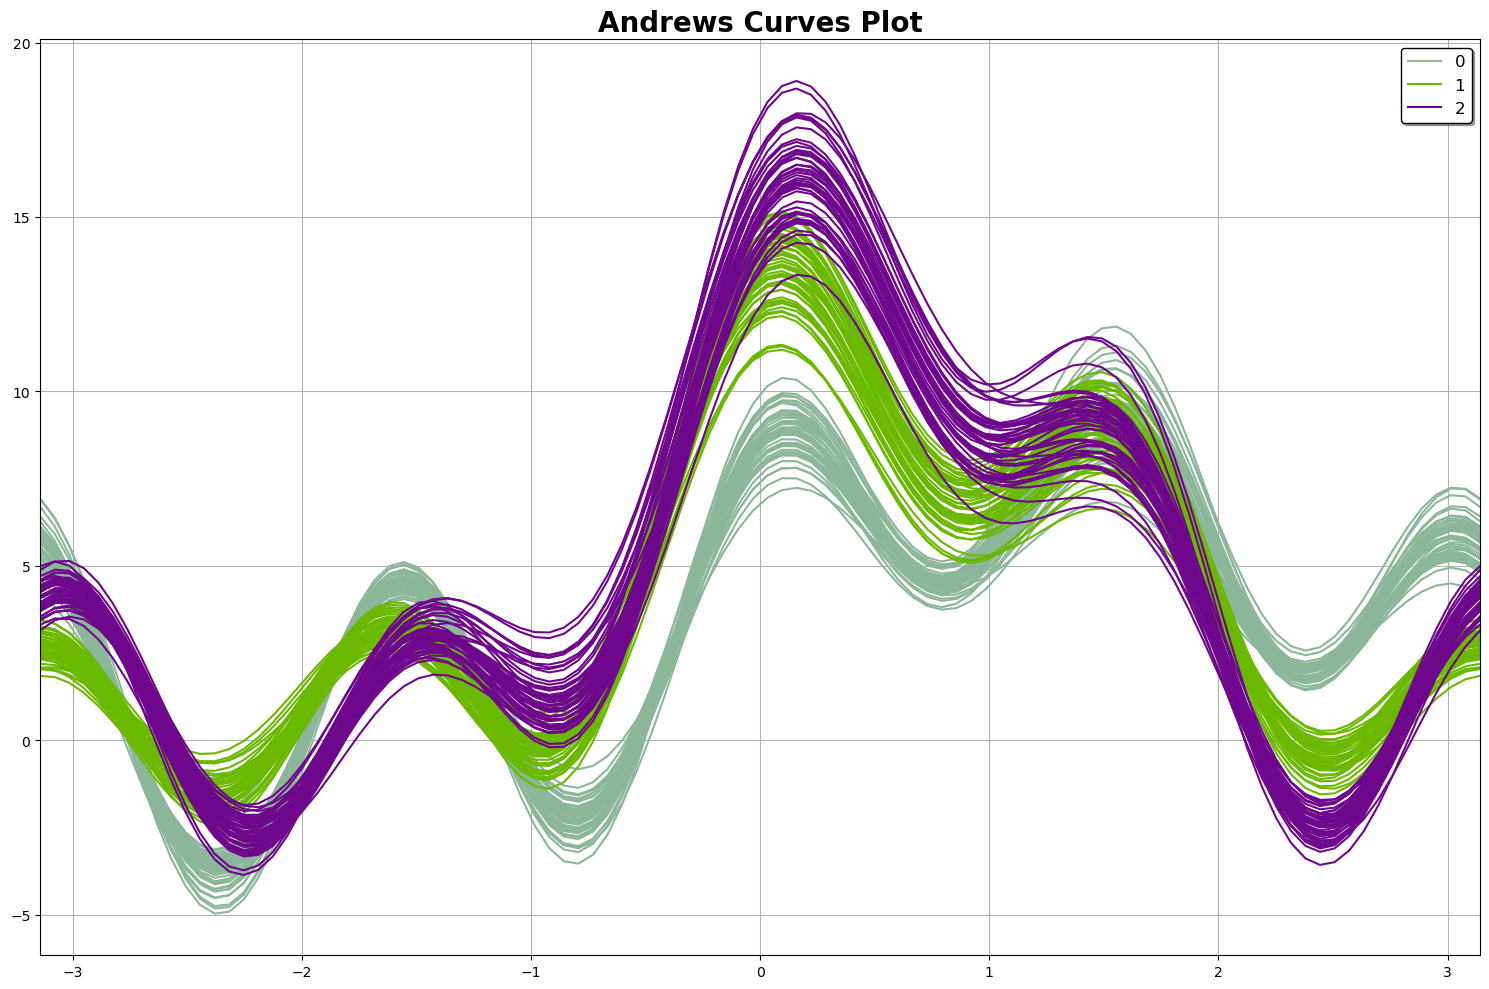

C:\Users\ariba\AppData\Local\Temp\ipykernel_56948\3011094614.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df_numeric['species_code'] = iris_df_encoded['species_code']


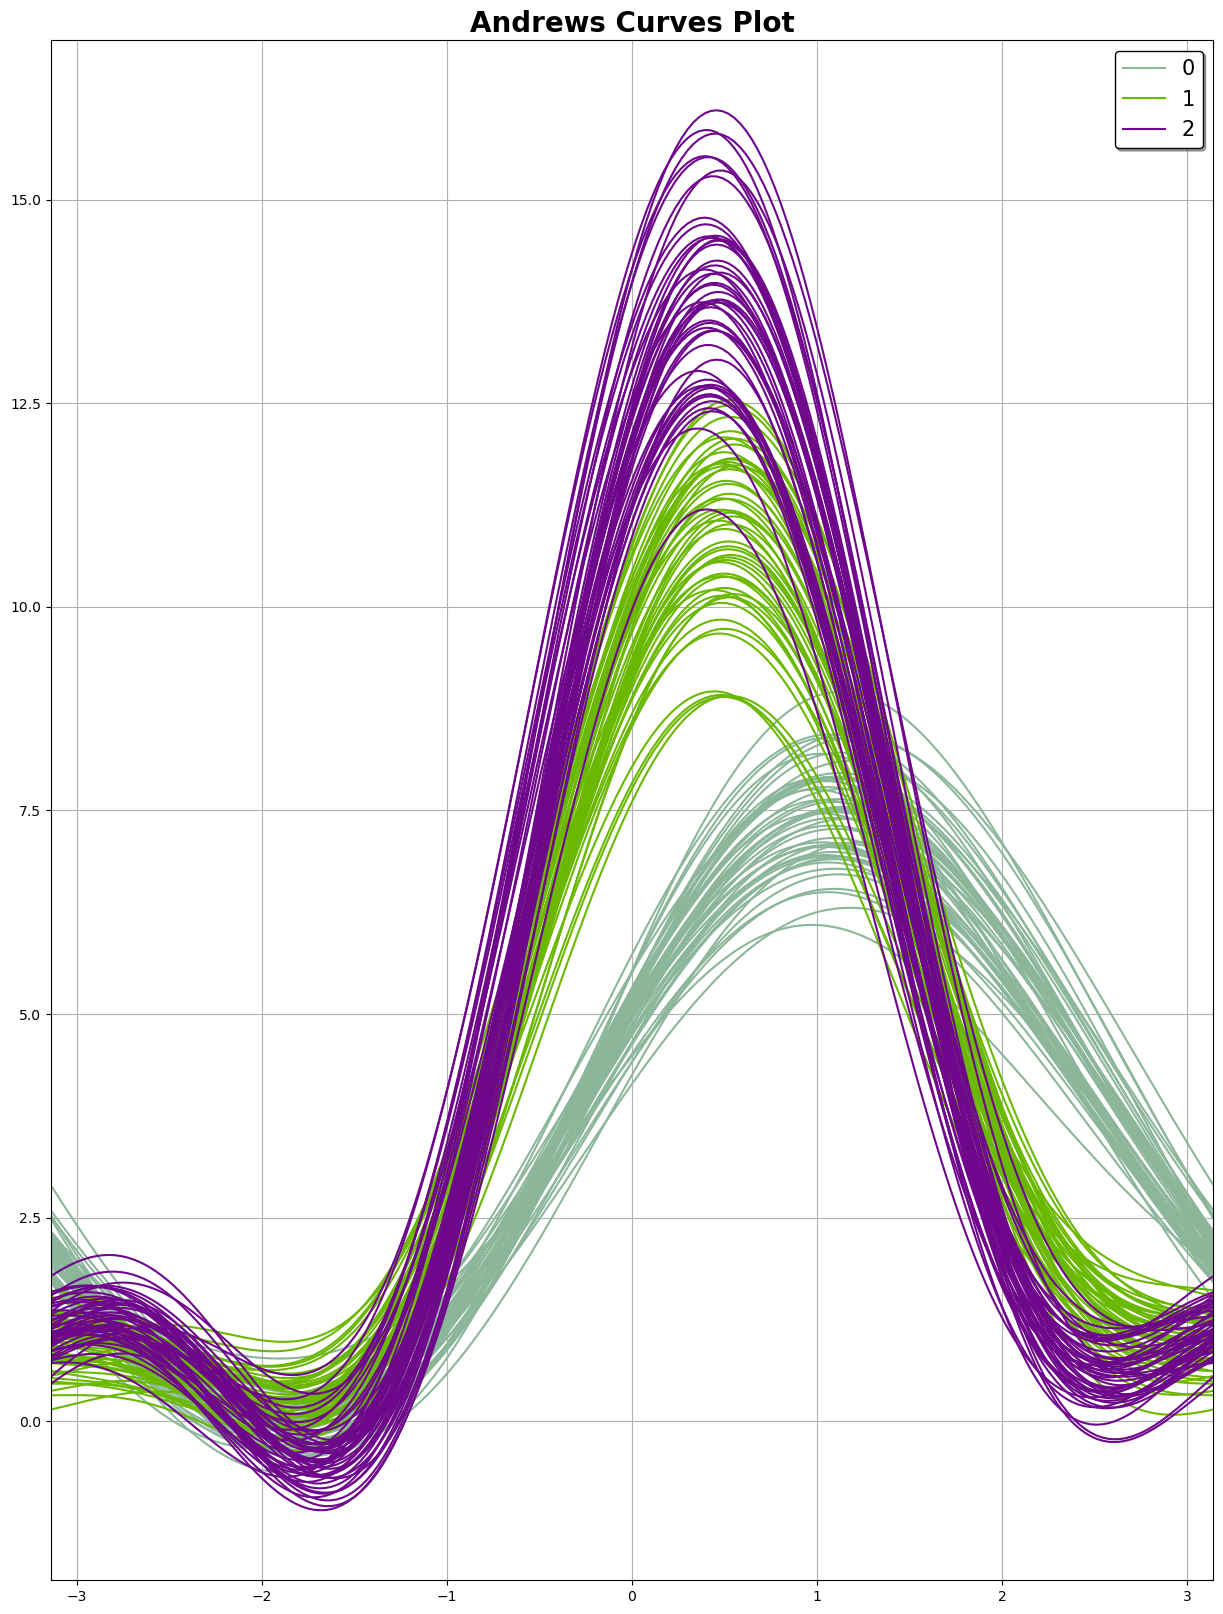

In [21]:
from pandas.plotting import andrews_curves# 1. Check for missing values and handle them

iris_df_encoded = iris_df.copy()
iris_df_encoded['species_code'] = le.fit_transform(iris_df['species_name'])
iris_df_encoded = iris_df_encoded.fillna(0)  # Fill NaN values with 0 or use another strategy

# 2. Ensure all columns except the target are numeric
# Convert categorical columns to numeric if needed
for col in iris_df_encoded.columns:
    if col != 'species_code' and iris_df_encoded[col].dtype == 'object':
        try:
            iris_df_encoded[col] = pd.to_numeric(iris_df_encoded[col])
        except:
            # If conversion fails, use one-hot encoding
            dummies = pd.get_dummies(iris_df_encoded[col], prefix=col)
            iris_df_encoded = pd.concat([iris_df_encoded.drop(col, axis=1), dummies], axis=1)

# 3. Make sure species_code is properly formatted
# If species_code is numeric but should be categorical
if pd.api.types.is_numeric_dtype(iris_df_encoded['species_code']):
    iris_df_encoded['species_code'] = iris_df_encoded['species_code'].astype(int).astype(str)

# 4. Create the plot with proper sizing and clear the previous figure
plt.figure(figsize=(15, 10))  # Adjusted size for better visibility
plt.clf()  # Clear any previous plots

# 5. Create Andrews curves with explicit sample size
andrews_curves(iris_df_encoded, 'species_code', samples=100)  # Limit samples if dataset is large

# 6. Enhance the plot
plt.title("Andrews Curves Plot", fontsize=20, fontweight='bold')
plt.legend(loc='best', prop={'size': 12}, frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()# Make sure all columns except 'species_code' are numeric
# Convert any non-numeric columns to numeric if possible
numeric_columns = iris_df_encoded.select_dtypes(include=['number']).columns
iris_df_numeric = iris_df_encoded[numeric_columns]

# Add back the species_code column for grouping
if 'species_code' not in numeric_columns:
    iris_df_numeric['species_code'] = iris_df_encoded['species_code']

# Now plot with only numeric data
plt.figure(figsize=(15, 20))
andrews_curves(iris_df_numeric, 'species_code')
plt.title("Andrews Curves Plot", fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Step 4: Train the KNN model
# You can experiment with different values of k
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [24]:
# Step 5: Make predictions
y_pred = knn.predict(X_test_scaled)

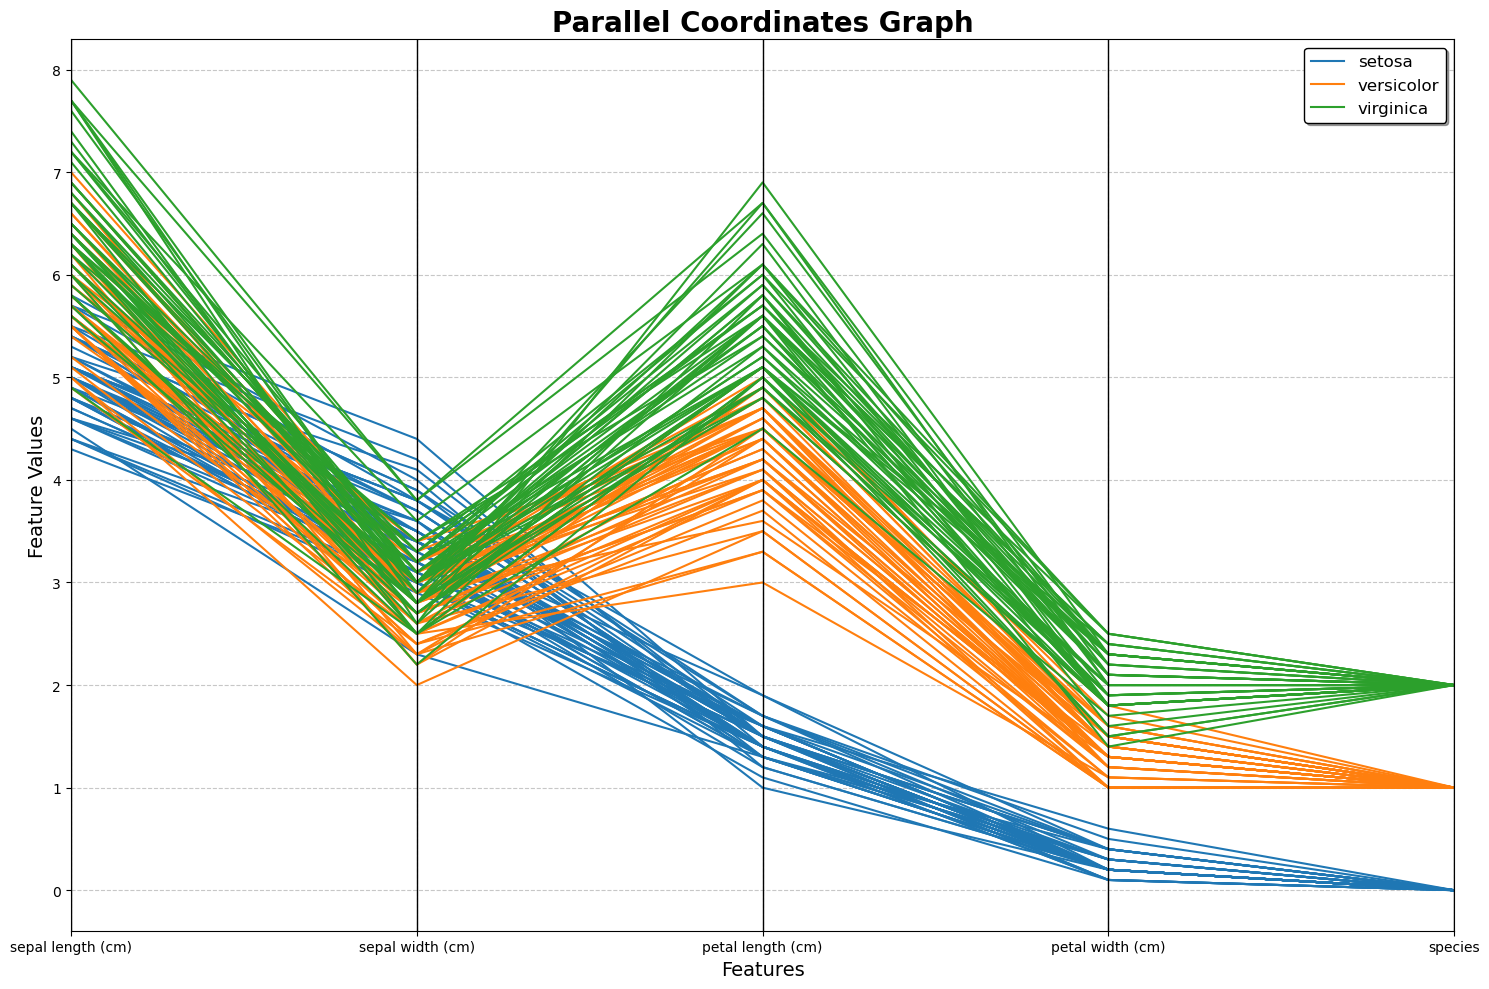

In [25]:
from pandas.plotting import parallel_coordinates

# Encode species_name to numeric species_code
species_mapping = {species: i for i, species in enumerate(iris_df['species_name'].unique())}
iris_df['species_code'] = iris_df['species_name'].map(species_mapping)

# Drop non-numeric columns except species_code
plot_df = iris_df.drop(columns=['species_name'])

# Confirm all feature columns are numeric
numeric_features = plot_df.select_dtypes(include=['number']).columns.drop('species_code')

# Plot Parallel Coordinates
plt.figure(figsize=(15, 10))
parallel_coordinates(plot_df, 'species_code', color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.title("Parallel Coordinates Graph", fontsize=20, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Values", fontsize=14)

# Custom legend using original species names
handles, labels = plt.gca().get_legend_handles_labels()
species_names = {v: k for k, v in species_mapping.items()}
new_labels = [species_names.get(int(label), label) for label in labels]
plt.legend(handles, new_labels, loc='best', prop={'size': 12}, frameon=True,
           shadow=True, facecolor='white', edgecolor='black')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
# Step 6: Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



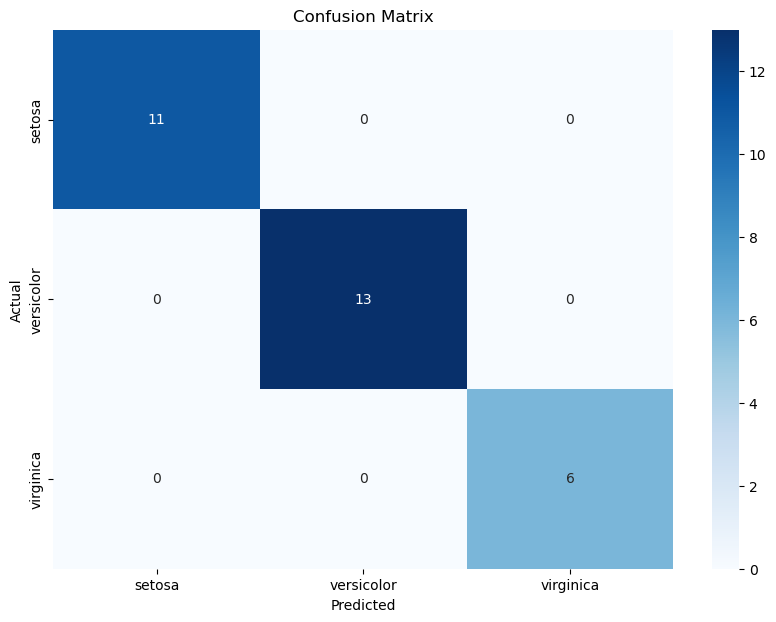

In [27]:
# Step 7: Visualize the confusion matrix
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

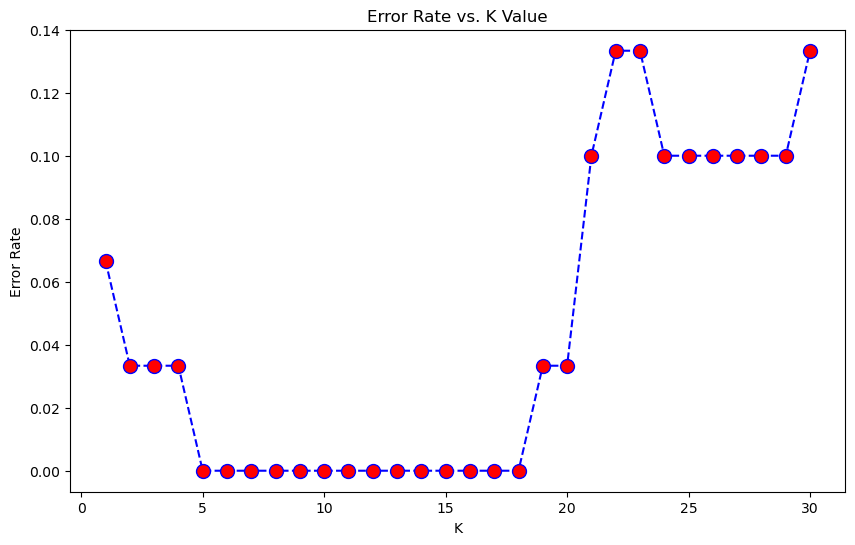

In [28]:
# Step 8: Find the optimal value of K
error_rates = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rates.append(np.mean(pred_i != y_test))

# Plot error rates vs k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rates, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [29]:
# Get the best k value
best_k = error_rates.index(min(error_rates)) + 1
print(f"The optimal number of neighbors is {best_k}")


The optimal number of neighbors is 5


In [30]:
# Train the model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
best_pred = best_knn.predict(X_test_scaled)
print(f"Accuracy with best k={best_k}: {round((accuracy_score(y_test, best_pred))*100,2)}%")

Accuracy with best k=5: 100.0%


## 🏁 Conclusion: Iris KNN Classification 

This project provided an end-to-end exploration of the classic Iris dataset, demonstrating practical techniques in data preparation, exploratory visualization, feature engineering, model training, and performance evaluation.

Using both graphical techniques—like Andrews curves and Parallel Coordinates plot, we visualized species separation across features, validating the dataset’s intuitive structure. The project then transitioned into supervised learning via K-Nearest Neighbors (KNN), successfully identifying the optimal number of neighbors and achieving up to 100% accuracy, which, although rare, reflects the dataset’s clean, well-separated clusters.

## 🌱 Key Takeaways
**Data Quality Matters:** The Iris dataset's clean structure enables even simple models to achieve high accuracy. Real-world datasets may require more robust preprocessing and feature engineering.

**Visualization is Insight:** Multivariate plots like Andrews curves and Parallel Coordinates are powerful tools for understanding class separation and feature impact in high-dimensional data.

**Model Evaluation Beyond Accuracy:** Perfect accuracy on a small test set can be misleading. Always validate with cross-validation, confusion matrices, and varied data splits to ensure reliability.

**Feature Scaling is Essential for Distance-Based Models:** Scaling with `StandardScaler` is critical for algorithms like KNN that rely on Euclidean distance.

**Modular, Reusable Code Wins:** From data encoding to plotting, packaging logic into reusable functions or pipelines improves clarity, repeatability, and maintainability.